In [1]:
import pandas as pd
import numpy as np

In [2]:
################# 3 - 2 데이터 병합 ##################
# 데이터 만들기
df_a = pd.DataFrame( {'key':['a','b','c','d','e'], 'num_a':[1,2,3,4,5 ] } )
df_b = pd.DataFrame( {'key':['a','b','d','f','g'], 'num_b':[11,15,35,45,55 ] } )
df_c = pd.DataFrame( {'key':['f','g','h','i','j'], 'num_a':[6,7,8,9,0 ] } )

In [3]:
df_a

,key,num_a
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5


In [4]:
df_b

,key,num_b
0,a,11
1,b,15
2,d,35
3,f,45
4,g,55


In [5]:
df_c

,key,num_a
0,f,6
1,g,7
2,h,8
3,i,9
4,j,0


In [6]:
## 위 아래로 붙이기
pd.concat( [df_a, df_b] ) # 컬럼명 다르므로, 결측치 처리 함

,key,num_a,num_b
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,d,4.0,NaN
4,e,5.0,NaN
0,a,NaN,11.0
1,b,NaN,15.0
2,d,NaN,35.0
3,f,NaN,45.0
4,g,NaN,55.0


In [7]:
pd.concat( [df_a,df_c] ) # 컬럼명 같으므로, 이어져서 처리

,key,num_a
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5
0,f,6
1,g,7
2,h,8
3,i,9
4,j,0


In [8]:
## 모두 합치기
pd.concat( [df_a, df_b, df_c] )

,key,num_a,num_b
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,d,4.0,NaN
4,e,5.0,NaN
0,a,NaN,11.0
1,b,NaN,15.0
2,d,NaN,35.0
3,f,NaN,45.0
4,g,NaN,55.0


In [9]:
# 옆으로 붙이기
pd.concat( [df_a, df_b, df_c], axis =1 )

,key,num_a,key,num_b,key,num_a
0,a,1,a,11,f,6
1,b,2,b,15,g,7
2,c,3,d,35,h,8
3,d,4,f,45,i,9
4,e,5,g,55,j,0


In [10]:
## merge   옆으로 합칠 때 많이 씀


In [11]:
df_a.merge(df_b) ## 교집합으로 나온다. inner join 으로 나옴.

,key,num_a,num_b
0,a,1,11
1,b,2,15
2,d,4,35


In [12]:
df_a.merge(df_b, how='inner') ## 교집합으로 나온다. inner join 으로 나옴.

,key,num_a,num_b
0,a,1,11
1,b,2,15
2,d,4,35


In [13]:
df_a.merge(df_b, how='outer') ## outer 양 쪽 다 null 포함하여 나옴

,key,num_a,num_b
0,a,1.0,11.0
1,b,2.0,15.0
2,c,3.0,NaN
3,d,4.0,35.0
4,e,5.0,NaN
5,f,NaN,45.0
6,g,NaN,55.0


In [14]:
df_a.merge(df_b, how='left') ## left

,key,num_a,num_b
0,a,1,11.0
1,b,2,15.0
2,c,3,NaN
3,d,4,35.0
4,e,5,NaN


In [15]:
df_a.merge(df_b, how='right') ##  right

,key,num_a,num_b
0,a,1.0,11
1,b,2.0,15
2,d,4.0,35
3,f,NaN,45
4,g,NaN,55


In [16]:
df_a.merge(df_b, on='key', how='right') ## merge 기준 key 지정

,key,num_a,num_b
0,a,1.0,11
1,b,2.0,15
2,d,4.0,35
3,f,NaN,45
4,g,NaN,55


In [17]:
# 데이터 만들기
df_a = pd.DataFrame( {'key':['a','b','c','d','e'], 'id':['q','w','e','r','t'] , 'num_a':[1,2,3,4,5 ] } )
df_b = pd.DataFrame( {'key':['a','b','d','f','g'], 'id':['q','w','z','x','y'] , 'num_b':[11,15,35,45,55 ] } )

In [18]:
df_a.merge(df_b) # 겹치는 부분만

,key,id,num_a,num_b
0,a,q,1,11
1,b,w,2,15


In [19]:
df_a.merge(df_b, on='key') # 기준키 지정. join key 지정

,key,id_x,num_a,id_y,num_b
0,a,q,1,q,11
1,b,w,2,w,15
2,d,r,4,z,35


In [20]:
df_a.merge(df_b, on='id') # 기준키 지정. join key 지정

,key_x,id,num_a,key_y,num_b
0,a,q,1,a,11
1,b,w,2,b,15


In [21]:
df_a.merge(df_b, on='id', how='left') # 기준키 지정. join key 지정. 중복컬럼 suffix 지정 되어 나옴 key_x, key_y

,key_x,id,num_a,key_y,num_b
0,a,q,1,a,11.0
1,b,w,2,b,15.0
2,c,e,3,NaN,NaN
3,d,r,4,NaN,NaN
4,e,t,5,NaN,NaN


In [22]:
# 데이터 만들기
df_a = pd.DataFrame( {'key':['a','b','c','d','e'],  'num_a':[1,2,3,4,5 ] } )
df_b = pd.DataFrame( {'id':['a','b','d','f','g'],  'num_b':[11,15,35,45,55 ] } ) # key와 id는 의미는 같은 value 정의

In [23]:
df_b

,id,num_b
0,a,11
1,b,15
2,d,35
3,f,45
4,g,55


In [24]:
# rename 방법or

df_a.merge(df_b, left_on ='key', right_on='id', how='outer')

,key,num_a,id,num_b
0,a,1.0,a,11.0
1,b,2.0,b,15.0
2,c,3.0,NaN,NaN
3,d,4.0,d,35.0
4,e,5.0,NaN,NaN
5,NaN,NaN,f,45.0
6,NaN,NaN,g,55.0


In [25]:
df_a.join(df_b, lsuffix = '_a', rsuffix='_b')  
# 왼쪽 오른쪽 각각 지정 .. 마치 concat 쓴것 처럼 결과가 나옴
# join 은 기준을 맨 앞 인덱스로 잡음

,key,num_a,id,num_b
0,a,1,a,11
1,b,2,b,15
2,c,3,d,35
3,d,4,f,45
4,e,5,g,55


In [26]:
# 데이터 만들기
df_a = pd.DataFrame( {'key':['a','b','c','d','e'],  'num_a':[1,2,3,4,5 ] } )
df_b = pd.DataFrame( {'key':['a','b','d','f','g'],  'num_b':[11,15,35,45,55 ] } ) # key와 id는 의미는 같은 value 정의

# key값을 인덱스로 지정 하기
df_a = df_a.set_index('key')
df_b = df_b.set_index('key')

In [27]:
df_a

,num_a
key,
a,1
b,2
c,3
d,4
e,5


In [28]:
df_b

,num_b
key,
a,11
b,15
d,35
f,45
g,55


In [29]:
df_a.join(df_b, how='inner')  # outer 등

,num_a,num_b
key,,
a,1,11
b,2,15
d,4,35


In [30]:
########################################### 데이터 불러 오기 ##################################################
salary_1 = pd.read_csv('~/data/salary_1.csv')
salary_2 = pd.read_csv('~/data/salary_2.csv')

In [31]:
salary_1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0


In [32]:
salary_2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,29,Female,1,Human Resources Coordinator,2,45000,China,Chinese,0
1,23,Male,0,Sales Associate,1,25000,USA,Asian,0
2,32,Female,2,Software Developer,7,90000,USA,African American,0
3,44,Male,1,Operations Manager,18,170000,USA,Hispanic,0
4,26,Female,1,Marketing Coordinator,2,40000,Canada,Asian,0


In [33]:
## 합치기
salary_df = pd.concat([salary_1 , salary_2])

In [34]:
salary_df ## 마지막 index 번호2684 ,  6684 건

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
2680,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
2681,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
2682,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
2683,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [35]:
salary_df.loc[0]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
0,29.0,Female,1,Human Resources Coordinator,2.0,45000,China,Chinese,0


In [36]:
salary_df.reset_index() # index라는 컬럼이 생김

,index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...,...
6679,2680,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
6680,2681,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
6681,2682,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
6682,2683,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [37]:
salary_df.reset_index(drop = True , inplace=True) # index라는 컬럼 생기지 않도록.

In [38]:
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [39]:
## 물가지수 적용 위한 데이터 부르기
cpi = pd.read_csv('~/data/cpi.csv')

In [40]:
cpi.head()

,Country,Reference,Last,Previous,Units,Frequency
0,United States,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
1,China,Sep-23,100,100.1,"Index CPPY=100, NSA",Monthly
2,Germany,Sep-23,117.9,117.5,"Index 2020=100, CDASA",Monthly
3,France,Sep-23,118.52,118.2,"Index 2015=100, SA",Monthly
4,United Kingdom,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly


In [41]:
salary_df['Country'].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

In [42]:
cpi['Country'].unique() # United States -> USA / United Kingdom -> UK 

array(['United States', 'China', 'Germany', 'France', 'United Kingdom',
       'Brazil', 'Italy', 'Russian Federation', 'Canada', 'Australia',
       'Spain', 'South Korea', 'Mexico', 'Indonesia', 'Netherlands'],
      dtype=object)

In [43]:
cpi['Country'] = cpi['Country'].replace({ 'United States':'USA' , 'United Kingdom':'UK' }) # 일치 시키고 

In [44]:
# 키값 지정
salary_df = salary_df.merge( cpi, on='Country', how='left' )

In [45]:
salary_df.head() # 불필요컬럼 확인 Reference , Previous, Units, Frequency

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Reference,Last,Previous,Units,Frequency
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,Sep-23,158.7,158.4,"Index 2002=100, SA",Monthly
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly


In [46]:
salary_df.drop( ['Reference' , 'Previous', 'Units', 'Frequency'] ,axis=1 , inplace=True)

In [47]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Last
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [48]:
salary_df = salary_df.rename({'Last':'CPI'}, axis=1)

In [49]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [50]:
################# 3 - 3 개요, 결측치&이상치, 집계 및 그룹화 , 피벗테이블 ##################
salary_df.info()  ## cpi 가 object네?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6684 entries, 0 to 6683
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6680 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
 9   CPI                  6684 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 574.4+ KB


In [51]:
salary_df['CPI'] = pd.to_numeric(salary_df['CPI'])

In [52]:
salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6680.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.00000
mean,33.611527,1.622382,8.084007,115307.175194,0.143477,167.12953
std,7.595506,0.880474,6.097824,52806.810881,0.350585,73.22657
min,21.000000,0.000000,-1.000000,350.000000,0.000000,100.00000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.00000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.30000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.70000
max,62.000000,3.000000,82.000000,250000.000000,1.000000,307.48000


In [53]:
#### missing value 처리 하기

In [54]:
salary_df.isna().sum()

Age                    4
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
CPI                    0
dtype: int64

In [55]:
salary_df.isna().mean()

Age                    0.000598
Gender                 0.000000
Education Level        0.000000
Job Title              0.000000
Years of Experience    0.000000
Salary                 0.000000
Country                0.000000
Race                   0.000000
Senior                 0.000000
CPI                    0.000000
dtype: float64

In [56]:
salary_df[salary_df['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
548,NaN,Male,1,Data Analyst,3.0,130000,Canada,White,0,158.70
2135,NaN,Female,3,Project Engineer,16.0,190000,USA,African American,1,307.48
2749,NaN,Female,1,Software Engineer,1.0,50000,Australia,White,0,135.30
3826,NaN,Female,2,Marketing Coordinator,8.0,85000,UK,Asian,0,132.00


In [57]:
## 결측치 드랍. 데이터가 .. 애매하므로\
salary_df = salary_df.dropna()

In [58]:
###### 이상치 찾기 : Years of Experience   82년 ?

In [59]:
salary_df[salary_df['Years of Experience']== -1]  # 제거하기로 함

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
102,49.0,Female,2,HR Manager,-1.0,150000,Australia,White,1,135.3
256,35.0,Male,1,Project Coordinator,-1.0,95000,UK,Asian,1,132.0
359,34.0,Male,1,Operations Coordinator,-1.0,90000,China,Chinese,1,100.0


In [60]:
salary_df = salary_df[salary_df['Years of Experience'] != -1]  # 제거하기로 함

In [61]:
# 82년 확인

In [62]:
salary_df['Years of Experience'].sort_values()

4931     0.0
5104     0.0
5115     0.0
5119     0.0
5143     0.0
        ... 
2396    33.0
2391    33.0
2490    34.0
2415    34.0
564     82.0
Name: Years of Experience, Length: 6677, dtype: float64

In [63]:
salary_df[salary_df['Years of Experience'] ==82]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3


In [64]:
#### 나이에 비해 경력이 긴 데이터 확인
salary_df[salary_df['Age'] < salary_df['Years of Experience']]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3


In [65]:
salary_df[salary_df['Years of Experience'] > salary_df[ 'Age'] - 18] # 13세 부터 일 가능? 아래 데이터 걷어 내고 시작

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3
2373,25.0,Male,3,Software Engineer Manager,12.0,169159,China,Chinese,0,100.0
2448,25.0,Male,3,Software Engineer Manager,12.0,169159,China,White,0,100.0


In [66]:
salary_df = salary_df[~(salary_df['Years of Experience'] > salary_df[ 'Age'] - 18)] # 13세 부터 일 가능? 아래 데이터 걷어 내고 시작

In [67]:
salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000
mean,33.612826,1.622116,8.076491,115294.402307,0.143093,167.164774
std,7.594369,0.880460,6.029750,52819.326323,0.350193,73.241730
min,21.000000,0.000000,0.000000,350.000000,0.000000,100.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.300000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.700000
max,62.000000,3.000000,34.000000,250000.000000,1.000000,307.480000


In [68]:
salary_df [salary_df['Years of Experience'] ==0]  ## 경력 0 확인, 만으로 1년 차지 않은 케이스 인것으로 인지. 넘어가겠음.

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
18,25.0,Female,1,Data Entry Clerk,0.0,35000,UK,Asian,0,132.00
49,25.0,Male,1,Help Desk Analyst,0.0,35000,USA,Asian,0,307.48
82,25.0,Male,1,Sales Representative,0.0,30000,Australia,Asian,0,135.30
2416,24.0,Male,2,Back end Developer,0.0,55538,USA,Asian,0,307.48
2430,22.0,Female,0,Back end Developer,0.0,51832,UK,White,0,132.00
...,...,...,...,...,...,...,...,...,...,...
6179,24.0,Female,0,Receptionist,0.0,25000,China,White,0,100.00
6193,24.0,Female,0,Receptionist,0.0,25000,Australia,Australian,0,135.30
6207,24.0,Female,0,Receptionist,0.0,25000,Australia,White,0,135.30
6221,24.0,Female,0,Receptionist,0.0,25000,UK,Welsh,0,132.00


In [69]:
#### 그룹핑 
salary_df[salary_df['Gender'] == 'Male']['Salary'].mean()  ## 남성의 평균 연봉

121383.05728314239

In [70]:
salary_df[salary_df['Gender'] == 'Female']['Salary'].mean()  ## 여성의 평균 연봉

107873.85405585106

In [71]:
# 위 너무 복잡
salary_df.groupby('Gender').mean() # 숫자형태로 연산 되는 것만 보여 짐

,Age,Education Level,Years of Experience,Salary,Senior,CPI
Gender,,,,,,
Female,32.622008,1.600066,7.417221,107873.854056,0.127992,167.485166
Male,34.425805,1.640207,8.617430,121383.057283,0.155483,166.901888


In [72]:
salary_df.groupby('Gender')['Salary'].mean() # 평균값

Gender
Female    107873.854056
Male      121383.057283
Name: Salary, dtype: float64

In [73]:
salary_df.groupby('Gender')['Salary'].median() # 중앙값

Gender
Female    105000.0
Male      120000.0
Name: Salary, dtype: float64

In [74]:
salary_df.groupby('Gender')['Salary'].std() # 표준편차

Gender
Female    52728.350439
Male      52117.611899
Name: Salary, dtype: float64

In [75]:
## 2개 이상 그룹핑
salary_df.groupby(['Gender', 'Country'])['Salary'].mean() 

Gender  Country  
Female  Australia    107936.054010
        Canada       106884.711340
        China        111291.211506
        UK           108495.273026
        USA          104854.691558
Male    Australia    120896.764216
        Canada       123973.921516
        China        120135.522148
        UK           122244.048476
        USA          119683.120433
Name: Salary, dtype: float64

In [76]:
salary_df.groupby(['Gender'])['Salary'].agg(['sum','mean'])  ## 함수 여러개 실행

,sum,mean
Gender,,
Female,324484553,107873.854056
Male,444990288,121383.057283


In [77]:
salary_df.groupby(['Gender', 'Country'])['Salary'].mean().reset_index()   # 데이터 프레임

,Gender,Country,Salary
0,Female,Australia,107936.054010
1,Female,Canada,106884.711340
2,Female,China,111291.211506
3,Female,UK,108495.273026
4,Female,USA,104854.691558
5,Male,Australia,120896.764216
6,Male,Canada,123973.921516
7,Male,China,120135.522148
8,Male,UK,122244.048476
9,Male,USA,119683.120433


In [78]:
################### 피봇 만들기 #####################

In [79]:
pd.pivot_table(salary_df, index ='Gender', columns = 'Country', values='Salary') ## 자동 평균 나옴

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [80]:
pd.pivot_table(salary_df, index ='Gender', columns = 'Country', values='Salary', aggfunc='median')

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,110000,105000,110000,105000,100000
Male,120000,130000,120000,120000,120000


In [81]:
pd.pivot_table(salary_df, index ='Gender', columns = 'Country', values='Salary', aggfunc=np.mean) ## 넘파이 평균 함수 사용

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [82]:
pd.pivot_table(salary_df, index ='Gender', columns = 'Country', values='Salary', aggfunc= sum) ## 

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,65948929,62206902,65773106,65965126,64590490
Male,87166567,91616728,89500964,88260203,88445826


In [83]:
pd.pivot_table(salary_df, index =['Gender', 'Race'], columns = 'Country', values='Salary', aggfunc= sum) ## 인덱스 여러개

Country                   Australia      Canada       China          UK  \
Gender Race                                                               
Female African American         NaN         NaN         NaN         NaN   
       Asian             22620268.0  20950962.0         NaN  14978857.0   
       Australian        22623208.0         NaN         NaN         NaN   
       Black                    NaN  20851624.0         NaN         NaN   
       Chinese                  NaN         NaN  20858851.0         NaN   
       Hispanic                 NaN         NaN         NaN         NaN   
       Korean                   NaN         NaN  23853851.0         NaN   
       Mixed                    NaN         NaN         NaN  15673240.0   
       Welsh                    NaN         NaN         NaN  17882663.0   
       White             20705453.0  20404316.0  21060404.0  17430366.0   
Male   African American         NaN         NaN         NaN         NaN   
       Asian             31837948.0  31446774.0         NaN  24308468.0   
       Australian        29011770.0         NaN         NaN         NaN   
       Black                    NaN  30659174.0         NaN         NaN   
       Chinese                  NaN         NaN  28164994.0         NaN   
       Hispanic                 NaN         NaN         NaN         NaN   
       Korean                   NaN         NaN  29660738.0         NaN   
       Mixed                    NaN         NaN         NaN  23181267.0   
       Welsh                    NaN         NaN         NaN  19600032.0   
       White             26316849.0  29510780.0  31675232.0  21170436.0   

Country                         USA  
Gender Race                          
Female African American  15448789.0  
       Asian             17533654.0  
       Australian               NaN  
       Black                    NaN  
       Chinese                  NaN  
       Hispanic          14526773.0  
       Korean                   NaN  
       Mixed                    NaN  
       Welsh                    NaN  
       White             17081274.0  
Male   African American  23910271.0  
       Asian             20421501.0  
       Australian               NaN  
       Black                    NaN  
       Chinese                  NaN  
       Hispanic          21025292.0  
       Korean                   NaN  
       Mixed                    NaN  
       Welsh                    NaN  
       White             23088762.0

In [84]:
#### 피봇 만 쓸경우
sales_df = pd.DataFrame( { 'company':['a','a','a','a','b','b','b','b']
                , 'quarter' : ['q1', 'q2', 'q3', 'q4', 'q1', 'q2', 'q3', 'q4' ]
                , 'sales' : [111,222,333,444,555,666,777,888]} )

In [85]:
sales_temp = pd.pivot(sales_df, index='company', columns ='quarter', values='sales')

In [86]:
sales_temp.columns = sales_temp.columns.rename('')

In [87]:
sales_temp

,q1,q2,q3,q4
company,,,,
a,111,222,333,444
b,555,666,777,888


In [88]:
new_sales_df = sales_temp.reset_index()

In [89]:
new_sales_df

,company,q1,q2,q3,q4
0,a,111,222,333,444
1,b,555,666,777,888


In [90]:
pd.pivot_table(sales_df, index='company', columns ='quarter', values='sales')

quarter,q1,q2,q3,q4
company,,,,
a,111,222,333,444
b,555,666,777,888


In [91]:
#### 피봇 역으로 분리
pd.melt(new_sales_df, id_vars='company', value_vars  = ['q1', 'q2', 'q3', 'q4'] , value_name='sales').sort_values('company')

,company,,sales
0,a,q1,111
2,a,q2,222
4,a,q3,333
6,a,q4,444
1,b,q1,555
3,b,q2,666
5,b,q3,777
7,b,q4,888


In [92]:
######################## 3-4 로그, 원-핫 인코딩 #########################

###### 로그 데이터 만들기
np.log10(10) # 밑이 10인 로그

1.0

In [93]:
np.log10(100) # 밑이 10인 로그   . 10 에 2승

2.0

In [94]:
np.log10(1000) # 밑이 10인 로그   . 10 에 3승 

3.0

In [95]:
np.log(1000) # 로그만 쓰면 자연로그. 밑수가 오일러 수

6.907755278982137

In [96]:
price_df = pd.DataFrame({'level' : [1,2,3,4,5,6,7] ,
              'price' : [1, 10, 100, 1000, 10000, 100000, 1000000 ]}) # 기하급수로 오르는 데이터 만들기

In [97]:
price_df

,level,price
0,1,1
1,2,10
2,3,100
3,4,1000
4,5,10000
5,6,100000
6,7,1000000


In [98]:
### 선점도 표시
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='level', ylabel='price'>

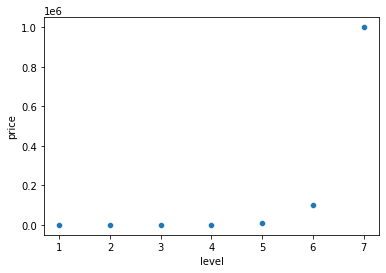

In [99]:
sns.scatterplot(x='level', y='price', data=price_df)

<AxesSubplot:xlabel='level', ylabel='price'>

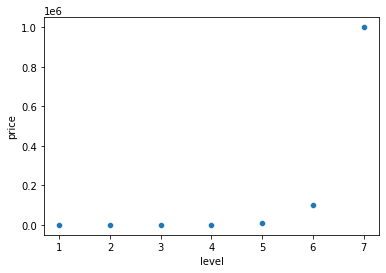

In [100]:
sns.scatterplot(x=price_df['level'], y=price_df['price'])

<AxesSubplot:xlabel='level', ylabel='price'>

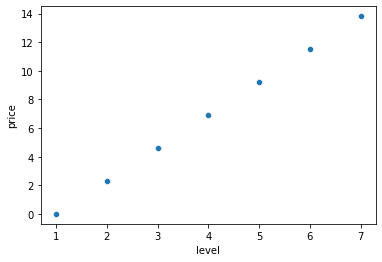

In [101]:
sns.scatterplot(x=price_df['level'], y= np.log( price_df['price'])) ## 간극 작게 하기 ... 리니어 리그레션 적용시 log 취하여 . 선형관계 만듦.

In [102]:
### 원래로 돌리고 싶다.
np.log(55)

4.007333185232471

In [103]:
np.exp(4.007333185232471)

55.000000000000014

In [104]:
############## 원 핫 인코딩 ####################    0 , 1 로 표현할 수 있는 데이터
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [105]:
pd.get_dummies(salary_df , columns = ['Gender'])  ### Gender_Female	Gender_Male 생김

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Gender_Female,Gender_Male
0,32.0,1,Software Engineer,5.0,90000,UK,White,0,132.00,0,1
1,28.0,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,1,0
2,45.0,3,Manager,15.0,150000,Canada,White,1,158.70,0,1
3,36.0,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,1,0
4,52.0,2,Director,20.0,200000,USA,Asian,0,307.48,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,1,0
6680,32.0,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,0,1
6681,30.0,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,1,0
6682,46.0,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,0,1


In [106]:
pd.get_dummies(salary_df , columns = ['Gender'], drop_first=True )  ### 앞에 있던 Gender_Female drop 하고 보여줌 

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Gender_Male
0,32.0,1,Software Engineer,5.0,90000,UK,White,0,132.00,1
1,28.0,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,0
2,45.0,3,Manager,15.0,150000,Canada,White,1,158.70,1
3,36.0,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,0
4,52.0,2,Director,20.0,200000,USA,Asian,0,307.48,1
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,0
6680,32.0,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,1
6681,30.0,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,0
6682,46.0,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,1


In [107]:
pd.get_option('display.max_columns', 50) # 지정 갯수 만큼 열 보기
pd.get_option('display.max_rows', 50) # 지정 갯수 만큼 열 보기

60

In [108]:
pd.get_dummies(salary_df , columns = ['Gender', 'Country', 'Race', 'Job Title'], drop_first=True )  ### 앞에 있던 Gender_Female drop 하고 보여줌 

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Designer,Job Title_Web Developer
0,32.0,1,5.0,90000,0,132.00,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,28.0,2,3.0,65000,0,307.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,3,15.0,150000,1,158.70,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,1,7.0,60000,0,307.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,2,20.0,200000,0,307.48,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,20.0,200000,0,132.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6680,32.0,0,3.0,50000,0,135.30,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6681,30.0,1,4.0,55000,0,100.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6682,46.0,2,14.0,140000,0,100.00,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
##### 위위 컬럼이 148개다 . 컬럼이 많으면 분석에 좋지 않음. 컬럼을 줄려 가면서 데이터를 정제 할 필요 있다.

In [110]:
salary_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [111]:
salary_df['Gender'].nunique()  # 유티크 갯수

2

In [113]:
salary_df[['Gender', 'Country', 'Race', 'Job Title'] ].nunique()  # 유티크 갯수

Gender         2
Country        5
Race          10
Job Title    129
dtype: int64

In [115]:
# job Title 웨 많음?   case 하나만 있는 것 좋은 예측치를 주지 못함.

salary_df['Job Title'].value_counts().tail(20)

Principal Scientist               1
Supply Chain Manager              1
Customer Success Rep              1
Technical Writer                  1
Developer                         1
CEO                               1
Chief Data Officer                1
Digital Content Producer          1
Customer Success Manager          1
Software Project Manager          1
Supply Chain Analyst              1
Office Manager                    1
Principal Engineer                1
Sales Operations Manager          1
Web Designer                      1
Director of Sales                 1
UX Researcher                     1
Director of Product Management    1
Consultant                        1
Human Resources Director          1
Name: Job Title, dtype: int64

In [116]:
salary_df['Job Title'].unique()    ### 시간이 많이 드는 ....;;; 이름 중구난방.

array(['Software Engineer', 'Data Analyst', 'Manager', 'Sales Associate',
       'Director', 'Marketing Analyst', 'Product Manager',
       'Sales Manager', 'Marketing Coordinator', 'Scientist',
       'Software Developer', 'HR Manager', 'Financial Analyst',
       'Project Manager', 'Customer Service Rep', 'Operations Manager',
       'Marketing Manager', 'Engineer', 'Data Entry Clerk',
       'Sales Director', 'Business Analyst', 'VP of Operations',
       'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Developer',
       'Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
       'Director of Marketing', 'Help Des

In [119]:
job = pd.read_csv('~/data/job.csv')

In [121]:
salary_df = salary_df.merge( job, on ='Job Title', how='left')

In [123]:
salary_df = salary_df.drop('Job Title', axis=1)

In [124]:
salary_df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Director


In [128]:
salary_df['Jobs'].nunique()

60

In [129]:
salary_df['Jobs'].value_counts()

Software                        2156
Marketing                        999
Data Scientist                   572
Sales                            453
HR                               420
Data Analyst                     389
Product Manager                  325
Project Engineer                 316
Financial                        200
Research                         195
Operations                       147
Web Developer                    129
Product Designer                  80
Receptionist                      57
Project Manager                   36
Business Analyst                  23
Graphic Designer                  23
Social Media                      18
Customer Service                  11
Business Development               7
UX                                 6
Accountant                         6
Business Development Manager       5
Account                            5
Delivery Driver                    5
Project Coordinator                4
Scientist                          4
R

In [130]:
salary_df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Director


In [133]:
salary_df = pd.get_dummies( salary_df , columns = [ 'Gender', 'Country' , 'Race' , 'Jobs'] , drop_first=True)   ### 79개 컬럼으로 정리

In [ ]:
###################### 3-5 스케일링 ##########################

In [134]:
salary_df['Age'].mean()

33.61282589151933

In [135]:
salary_df['Age'].std()

7.594369005848066

In [ ]:
#######  스탠다드 스케일링 변환 ###########


In [136]:
 ( salary_df['Age'] - salary_df['Age'].mean() ) / salary_df['Age'].std()

0      -0.212371
1      -0.739077
2       1.499423
3       0.314335
4       2.421159
          ...   
6669    2.026129
6670   -0.212371
6671   -0.475724
6672    1.631100
6673   -1.002430
Name: Age, Length: 6674, dtype: float64

In [138]:
############## 로버스트 스케일링 쿼터 나누기 
salary_df['Age'].quantile(0.25) ## 25%  
salary_df['Age'].quantile(0.50) ## 50%
salary_df['Age'].quantile(0.75) ## 75%

28.0

In [139]:
( salary_df['Age'] - salary_df['Age'].quantile(0.50) ) /  (salary_df['Age'].quantile(0.75) - salary_df['Age'].quantile(0.25)) ## Q2 지점 빼고 q3 -q1 값으로 나눔

0       0.0
1      -0.4
2       1.3
3       0.4
4       2.0
       ... 
6669    1.7
6670    0.0
6671   -0.2
6672    1.4
6673   -0.6
Name: Age, Length: 6674, dtype: float64

In [ ]:
##############  min max 스케일링


In [140]:
salary_df['Age'].min()

21.0

In [141]:
salary_df['Age'].max()

62.0

In [142]:
( salary_df['Age'] - salary_df['Age'].min() ) / ( salary_df['Age'].max() -  salary_df['Age'].min())

0       0.268293
1       0.170732
2       0.585366
3       0.365854
4       0.756098
          ...   
6669    0.682927
6670    0.268293
6671    0.219512
6672    0.609756
6673    0.121951
Name: Age, Length: 6674, dtype: float64

In [ ]:
################# 스케일링 자동으로 해 주기 ####################

In [143]:
from sklearn.preprocessing import StandardScaler , RobustScaler, MinMaxScaler

In [144]:
# import  sklearn.preprocessing   해서 쓰면 너무 방대한 양의 메모리를 차지 하게 됨  위처럼. 딱딱 필요 한 것만 부르기.
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [146]:
ss.fit(salary_df) # 학습

StandardScaler()

In [147]:
ss.transform(salary_df) # 연산 넘파이 어레이 형태로 나옴. 각 [] 는 각 row임

array([[-0.2123872 , -0.70663318, -0.51025684, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [-0.7391327 ,  0.42922179, -0.84197037, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [ 1.49953568,  1.56507675,  1.14831086, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       ...,
       [-0.47575995, -0.70663318, -0.6761136 , ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [ 1.63122206,  0.42922179,  0.98245409, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [-1.00250545, -1.84248814, -1.17368391, ..., -0.029997  ,
        -0.01224164, -0.14039125]])

In [149]:
pd.DataFrame(ss.transform(salary_df) )# 데이터 프레임으로 보기, 컬럼 이름이 사라지네~

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,-0.212387,-0.706633,-0.510257,-0.478921,-0.408641,-0.480155,0.905822,-0.496767,-0.500281,2.004506,...,-0.052003,1.447601,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
1,-0.739133,0.429222,-0.841970,-0.952268,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
2,1.499536,1.565077,1.148311,0.657112,2.447137,-0.115582,0.905822,2.013016,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
3,0.314358,-0.706633,-0.178543,-1.046938,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
4,2.421340,0.429222,1.977595,1.603806,-0.408641,1.915926,0.905822,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,2.026281,1.565077,1.977595,1.603806,-0.408641,-0.480155,-1.103970,-0.496767,-0.500281,2.004506,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
6670,-0.212387,-1.842488,-0.841970,-1.236277,-0.408641,-0.435096,0.905822,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
6671,-0.475760,-0.706633,-0.676114,-1.141607,-0.408641,-0.917097,-1.103970,-0.496767,1.998877,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
6672,1.631222,0.429222,0.982454,0.467773,-0.408641,-0.917097,0.905822,-0.496767,1.998877,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391


In [151]:
salary_df.columns

Index(['Age', 'Education Level', 'Years of Experience', 'Salary', 'Senior',
       'CPI', 'Gender_Male', 'Country_Canada', 'Country_China', 'Country_UK',
       'Country_USA', 'Race_Asian', 'Race_Australian', 'Race_Black',
       'Race_Chinese', 'Race_Hispanic', 'Race_Korean', 'Race_Mixed',
       'Race_Welsh', 'Race_White', 'Jobs_Accountant', 'Jobs_Administrative',
       'Jobs_Advertising Coordinator', 'Jobs_Business Analyst',
       'Jobs_Business Development', 'Jobs_Business Development ',
       'Jobs_Business Development Manager', 'Jobs_CEO', 'Jobs_CTO',
       'Jobs_Consultant', 'Jobs_Copywriter', 'Jobs_Creative Director',
       'Jobs_Customer Service', 'Jobs_Customer Success', 'Jobs_Data Analyst',
       'Jobs_Data Engineer', 'Jobs_Data Entry Clerk', 'Jobs_Data Scientist',
       'Jobs_Delivery Driver', 'Jobs_Designer',
       'Jobs_Digital Content Producer', 'Jobs_Director', 'Jobs_Engineer',
       'Jobs_Engineering', 'Jobs_Event Coordinator', 'Jobs_Financial',
       'Jobs_G

In [153]:
ss_df = pd.DataFrame(ss.transform(salary_df) , columns = salary_df.columns )# 데이터 프레임으로 보기, 컬럼 이름 넣어주기

In [154]:
ss_df

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,-0.212387,-0.706633,-0.510257,-0.478921,-0.408641,-0.480155,0.905822,-0.496767,-0.500281,2.004506,...,-0.052003,1.447601,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
1,-0.739133,0.429222,-0.841970,-0.952268,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
2,1.499536,1.565077,1.148311,0.657112,2.447137,-0.115582,0.905822,2.013016,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
3,0.314358,-0.706633,-0.178543,-1.046938,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
4,2.421340,0.429222,1.977595,1.603806,-0.408641,1.915926,0.905822,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,2.026281,1.565077,1.977595,1.603806,-0.408641,-0.480155,-1.103970,-0.496767,-0.500281,2.004506,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
6670,-0.212387,-1.842488,-0.841970,-1.236277,-0.408641,-0.435096,0.905822,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
6671,-0.475760,-0.706633,-0.676114,-1.141607,-0.408641,-0.917097,-1.103970,-0.496767,1.998877,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
6672,1.631222,0.429222,0.982454,0.467773,-0.408641,-0.917097,0.905822,-0.496767,1.998877,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391


In [155]:
##################################################################################################
rs.fit(salary_df)

RobustScaler()

In [158]:
rs_df = pd.DataFrame (rs.transform(salary_df) , columns = salary_df.columns)

In [159]:
##################################################################################################
mm.fit(salary_df)

MinMaxScaler()

In [162]:
mm_df = pd.DataFrame ( mm.transform(salary_df) , columns = salary_df.columns)

In [163]:
##################################################################################################
ss_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,-0.212387,-0.706633,-0.510257,-0.478921,-0.408641,-0.480155,0.905822,-0.496767,-0.500281,2.004506,...,-0.052003,1.447601,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
1,-0.739133,0.429222,-0.841970,-0.952268,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
2,1.499536,1.565077,1.148311,0.657112,2.447137,-0.115582,0.905822,2.013016,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
3,0.314358,-0.706633,-0.178543,-1.046938,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
4,2.421340,0.429222,1.977595,1.603806,-0.408641,1.915926,0.905822,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391


In [164]:
rs_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,0.0,0.0,-0.222222,-0.277778,0.0,-0.123596,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.4,1.0,-0.444444,-0.555556,0.0,6.448689,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.3,2.0,0.888889,0.388889,1.0,0.876404,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.0,0.000000,-0.611111,0.0,6.448689,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.444444,0.944444,0.0,6.448689,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
mm_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,0.268293,0.333333,0.147059,0.359103,0.0,0.154232,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.170732,0.666667,0.088235,0.258963,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.585366,1.000000,0.441176,0.599439,1.0,0.282919,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.365854,0.333333,0.205882,0.238935,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.756098,0.666667,0.588235,0.799720,0.0,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
salary_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,32.0,1,5.0,90000,0,132.00,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,28.0,2,3.0,65000,0,307.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,3,15.0,150000,1,158.70,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,1,7.0,60000,0,307.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,2,20.0,200000,0,307.48,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
ss_df.describe()   # mean 은 0에 근접  / std 는 1에 근접

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6.674000e+03,6.674000e+03,6674.000000,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,...,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03
mean,3.406858e-17,1.277572e-16,0.000000,1.022057e-16,1.022057e-16,-2.571113e-16,-1.192400e-16,-7.186340e-17,-3.619786e-17,-6.427782e-17,...,3.406858e-17,-3.406858e-17,-2.129286e-18,-1.064643e-18,4.258572e-18,-2.129286e-18,-2.129286e-18,-4.258572e-18,-2.129286e-18,-4.258572e-17
std,1.000075e+00,1.000075e+00,1.000075,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,...,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00
min,-1.660937e+00,-1.842488e+00,-1.339541,-2.176344e+00,-4.086407e-01,-9.170975e-01,-1.103970e+00,-4.967671e-01,-5.002809e-01,-4.988760e-01,...,-5.200314e-02,-6.907983e-01,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
25%,-7.391327e-01,-7.066332e-01,-0.841970,-8.575989e-01,-4.086407e-01,-4.801554e-01,-1.103970e+00,-4.967671e-01,-5.002809e-01,-4.988760e-01,...,-5.200314e-02,-6.907983e-01,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
50%,-2.123872e-01,-7.066332e-01,-0.178543,-5.574179e-03,-4.086407e-01,-4.350957e-01,9.058216e-01,-4.967671e-01,-5.002809e-01,-4.988760e-01,...,-5.200314e-02,-6.907983e-01,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
75%,5.777311e-01,4.292218e-01,0.650741,8.464505e-01,-4.086407e-01,-1.155818e-01,9.058216e-01,-4.967671e-01,-5.002809e-01,-4.988760e-01,...,-5.200314e-02,1.447601e+00,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
max,3.738204e+00,1.565077e+00,4.299589,2.550500e+00,2.447137e+00,1.915926e+00,9.058216e-01,2.013016e+00,1.998877e+00,2.004506e+00,...,1.922961e+01,1.447601e+00,8.168843e+01,8.168843e+01,4.715577e+01,8.168843e+01,5.775812e+01,3.333667e+01,8.168843e+01,7.122951e+00


In [169]:
rs_df.describe() # 평균이 완전히 0이 되진 않음.

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,...,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000
mean,0.161283,0.622116,0.119610,0.003271,0.143093,1.193437,-0.450704,0.197932,0.200180,0.199281,...,0.002697,0.323045,0.000150,0.000150,0.000450,0.000150,0.00030,0.000899,0.000150,0.019329
std,0.759437,0.880460,0.669972,0.586881,0.350193,2.743136,0.497601,0.398471,0.400165,0.399490,...,0.051867,0.467675,0.012241,0.012241,0.021198,0.012241,0.01731,0.029972,0.012241,0.137688
min,-1.100000,-1.000000,-0.777778,-1.273889,0.000000,-1.322097,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-0.400000,0.000000,-0.444444,-0.500000,0.000000,-0.123596,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.555556,0.500000,0.000000,0.876404,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,3.000000,2.000000,3.000000,1.500000,1.000000,6.448689,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [170]:
mm_df.describe() # 0 1 사이. - 없음.

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,...,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000
mean,0.307630,0.540705,0.237544,0.460422,0.143093,0.323717,0.549296,0.197932,0.200180,0.199281,...,0.002697,0.323045,0.000150,0.000150,0.000450,0.000150,0.00030,0.000899,0.000150,0.019329
std,0.185229,0.293487,0.177346,0.211574,0.350193,0.353006,0.497601,0.398471,0.400165,0.399490,...,0.051867,0.467675,0.012241,0.012241,0.021198,0.012241,0.01731,0.029972,0.012241,0.137688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.170732,0.333333,0.088235,0.278991,0.000000,0.154232,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.268293,0.333333,0.205882,0.459243,0.000000,0.170137,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.414634,0.666667,0.352941,0.639495,0.000000,0.282919,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
### 어떨때 각각을 쓰나요?
##### ss = 아웃라이어 없는거에 적합. 정규 분포 따를때 적합
##### rs = 아웃라이어 많은 데이터 적합. 정규 분포 안따르는 데 적합
##### mm =  데이터의 범위를 제한하고 싶을때. ex> 딥러닝

#### 스케일링은 거리기반 메소드에 잘 적용 된다. 
# 유의할 점은 원핫 인코딩 통해서 만들어 진 값들 중 0, 1 로만 돼 있는 경우 스케일링을 했음에도 큰 거리를 갖게 된다.

In [171]:
###### fit , transform 한번에 하기
ss.fit_transform(salary_df)

array([[-0.2123872 , -0.70663318, -0.51025684, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [-0.7391327 ,  0.42922179, -0.84197037, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [ 1.49953568,  1.56507675,  1.14831086, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       ...,
       [-0.47575995, -0.70663318, -0.6761136 , ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [ 1.63122206,  0.42922179,  0.98245409, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [-1.00250545, -1.84248814, -1.17368391, ..., -0.029997  ,
        -0.01224164, -0.14039125]])

In [ ]:
#####################  PCA ############################

In [172]:
from sklearn.decomposition import PCA

In [173]:
pca = PCA()

In [174]:
pca.fit(salary_df) ## 학습

PCA()

In [175]:
pca.transform(salary_df) ### 넘파이 어레이

array([[-2.52944014e+04, -3.59275148e+01,  4.21191992e-01, ...,
         2.12267080e-03, -1.75193161e-04,  7.72588945e-14],
       [-5.02944071e+04,  1.38806380e+02, -3.33186512e-01, ...,
         1.01275316e-03,  1.23495617e-03,  1.50095655e-13],
       [ 3.47055994e+04, -7.43207716e+00,  8.55241614e+00, ...,
         8.92432204e-04, -2.76028100e-02, -1.06788327e-13],
       ...,
       [-6.02944004e+04, -6.89844214e+01,  3.00540402e+00, ...,
         1.05946883e-03, -4.72320804e-04,  1.83777855e-13],
       [ 2.47056013e+04, -6.64368293e+01,  1.01326446e+01, ...,
        -2.42897543e-04,  4.70331895e-04, -7.35995979e-14],
       [-8.02944027e+04, -1.08815289e+01,  8.36713663e-01, ...,
         1.17713231e-04,  4.69571661e-04,  2.43402903e-13]])

In [176]:
pd.DataFrame(pca.transform(salary_df)) #### 보기편하게 하기

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,-25294.401449,-35.927515,0.421192,1.180524,0.539384,-0.180507,0.681376,0.184226,1.002788,-0.353779,...,-0.000454,-0.000172,0.001163,0.000857,0.000820,-0.000196,0.002147,0.002123,-0.000175,7.725889e-14
1,-50294.407066,138.806380,-0.333187,0.224362,-0.958083,-0.241859,-0.241186,-0.383320,-0.143392,-0.010515,...,-0.000087,0.000091,-0.001037,-0.000251,-0.000776,0.000201,0.001553,0.001013,0.001235,1.500957e-13
2,34705.599441,-7.432077,8.552416,1.092177,-0.704550,-0.298237,0.195463,1.195063,-0.003915,-0.012052,...,0.000301,0.000116,0.000623,-0.000513,-0.000525,0.001282,0.001402,0.000892,-0.027603,-1.067883e-13
3,-55294.405818,138.644191,9.233644,1.028194,0.255635,-0.216322,-0.515753,-0.434514,-0.106573,0.012223,...,-0.000118,0.000059,-0.000689,0.000207,-0.000112,0.000632,0.000912,-0.000132,0.001361,1.650837e-13
4,84705.595635,142.853086,10.357471,1.719041,0.880828,0.481965,-0.161033,-0.207667,-0.462547,-0.233319,...,0.044788,-0.292259,-0.162288,-0.371234,0.197064,-0.248065,0.290574,0.118531,-0.076433,-2.675182e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,84705.600608,-32.627228,7.654235,0.031748,-0.428730,0.296013,-0.823992,-0.544413,0.631546,-0.487361,...,-0.000603,0.000485,-0.001367,0.001040,0.001213,-0.001089,-0.001095,-0.001398,0.001801,-2.561897e-13
6670,-65294.401335,-33.835290,4.861691,1.979699,1.185291,0.089906,-0.103538,0.063824,-0.378510,-0.455633,...,-0.001030,-0.001251,0.000999,0.000386,-0.000112,-0.000358,-0.000158,-0.000364,-0.000072,1.984883e-13
6671,-60294.400430,-68.984421,3.005404,0.147405,-0.009182,-0.480902,-0.366391,-0.660713,-0.521658,0.279341,...,0.000066,0.000203,-0.000362,-0.000336,-0.000682,0.000114,0.001197,0.001059,-0.000472,1.837779e-13
6672,24705.601309,-66.436829,10.132645,2.191822,0.216634,-0.434056,-0.145218,-0.433333,-0.897425,-0.204442,...,0.000368,-0.000616,0.001235,-0.000035,-0.000516,0.000076,-0.000504,-0.000243,0.000470,-7.359960e-14


In [177]:
pca = PCA(2)

In [181]:
pd.DataFrame(pca.fit_transform(salary_df) , columns=['PC1', 'PC2'] )  # 얼마만큼의 정보 손실이 있는가 확인하면서 차원 찾아가기

,PC1,PC2
0,-25294.401449,-35.927515
1,-50294.407066,138.806380
2,34705.599441,-7.432077
3,-55294.405818,138.644191
4,84705.595635,142.853086
...,...,...
6669,84705.600608,-32.627228
6670,-65294.401335,-33.835290
6671,-60294.400430,-68.984421
6672,24705.601309,-66.436829


In [182]:
# 얼마나 유실
pca.explained_variance_ratio_  # 각 주성분이 갖는 정보의 크기

array([9.99998063e-01, 1.92195955e-06])

In [183]:
pca.explained_variance_ratio_.sum() # 위 두개 더해봐 . 대부분의 정보를 보유 하고 있다 0.9999~

0.9999999848414092

In [ ]:
#### 위 작업은 데이터 시각화 할때 유용함.

In [184]:
salary_df.corr() ## 상관관계 확인

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
Age,1.000000,0.597131,0.938002,0.729071,0.333341,-0.027109,0.118189,0.005074,0.017223,0.011160,...,-0.044524,0.002858,0.026417,0.015133,0.006666,-0.010660,0.013423,0.013380,-0.007436,-0.068369
Education Level,0.597131,1.000000,0.612996,0.645249,0.274061,-0.016302,0.022686,0.001361,0.002490,0.022404,...,-0.036747,-0.034312,-0.008650,-0.008650,-0.014985,-0.008650,-0.002401,0.029911,-0.008650,-0.062120
Years of Experience,0.938002,0.612996,1.000000,0.811046,0.317443,-0.022393,0.099047,0.005579,0.013838,0.013330,...,-0.041389,0.000430,0.028270,0.020148,-0.001441,-0.012337,0.011267,0.005838,-0.010307,-0.102502
Salary,0.729071,0.645249,0.811046,1.000000,0.223751,-0.021693,0.127268,0.010821,0.008797,0.006277,...,-0.058547,0.047428,0.003408,-0.002386,-0.018187,-0.016293,-0.010750,-0.003480,-0.016293,-0.147764
Senior,0.333341,0.274061,0.317443,0.223751,1.000000,-0.020193,0.039063,0.012860,0.014788,-0.001407,...,-0.021251,-0.059025,-0.005002,-0.005002,0.011521,-0.005002,0.017647,0.030574,-0.005002,-0.057370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jobs_Technical Writer,-0.010660,-0.008650,-0.012337,-0.016293,-0.005002,-0.005326,0.011089,-0.006081,-0.006124,-0.006107,...,-0.000637,-0.008457,-0.000150,-0.000150,-0.000260,1.000000,-0.000212,-0.000367,-0.000150,-0.001719
Jobs_Training Specialist,0.013423,-0.002401,0.011267,-0.010750,0.017647,0.015585,-0.019114,0.013126,-0.008662,-0.008637,...,-0.000900,-0.011960,-0.000212,-0.000212,-0.000367,-0.000212,1.000000,-0.000519,-0.000212,-0.002431
Jobs_UX,0.013380,0.029911,0.005838,-0.003480,0.030574,0.011603,-0.033116,-0.002354,-0.015007,0.010067,...,-0.001560,-0.020722,-0.000367,-0.000367,-0.000636,-0.000367,-0.000519,1.000000,-0.000367,-0.004211
Jobs_Web Designer,-0.007436,-0.008650,-0.010307,-0.016293,-0.005002,-0.011227,0.011089,-0.006081,0.024470,-0.006107,...,-0.000637,-0.008457,-0.000150,-0.000150,-0.000260,-0.000150,-0.000212,-0.000367,1.000000,-0.001719


In [ ]:
### pca의 단점. 각 정보들이 어떤 정보를 담고 있는지 알수 없음.